In [19]:
import pandas as pd
from sqlalchemy import create_engine
from matplotlib.dates import DateFormatter

In [2]:
DATABASE_TYPE="postgresql"
USERNAME="mutakabbir"
PASSWORD="lightning"
HOST="localhost"
PORT=5432
DATABASE_NAME="postgres"
FIRE_SUBDIVISION_TABLE = "fire_division_dataset"

In [3]:
engine = create_engine(f"{DATABASE_TYPE}://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE_NAME}")

In [5]:
query_days_between_fire_by_subdivision = """
with ofd as (
	select fdd.division_id, fdd.start_date  
	from fire_division_dataset fdd 
	group by fdd.start_date, fdd.division_id)
select 
	fpd.division_id,
	avg(fpd.start_date - fpd.prequel_fire) as days_between_fires
from (
	select 
		ofd.division_id, 
		lag(ofd.start_date, 1) over (order by ofd.start_date) as prequel_fire, 
		ofd.start_date
	from ofd
	order by ofd.start_date) as fpd
where (fpd.start_date - fpd.prequel_fire) >= make_interval(days => 1) 
group by fpd.division_id 
order by fpd.division_id
"""

In [12]:
days_between_fire_df = pd.read_sql(query_days_between_fire_by_subdivision, con=engine, index_col='division_id')
days_between_fire_df

,days_between_fires
division_id,
0,1 days 15:15:00
1,1 days 16:00:00
2,2 days 00:00:00
3,1 days 00:00:00
4,8 days 06:10:17.142857
...,...
62,3 days 18:54:36.998369
63,3 days 17:06:00
64,5 days 19:42:26.341463


<AxesSubplot:xlabel='division_id'>

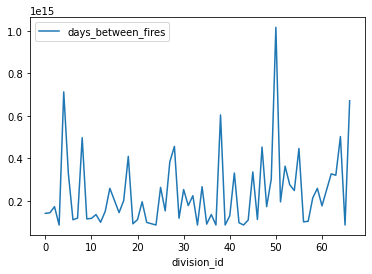

In [23]:
days_between_fire_df.plot()

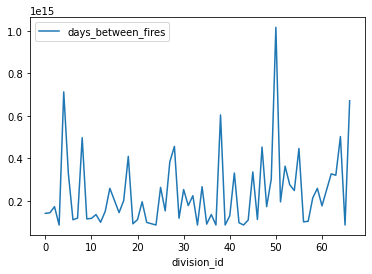

In [25]:
ax = days_between_fire_df.plot()